In [1]:
# Building model packages
import tensorflow as tf
# Display / visual packages
import matplotlib.pyplot as plt
# Data analysis / processing packages
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Explanation packages
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Directories packages
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets
import plotly.express as px
import pandas as pd

In [3]:
data_path = '/Users/jayyadav/Downloads/data-table.csv'

In [4]:
df = pd.read_csv(data_path)

# Convert each column to an array (list)
dataset = [df[col].tolist() for col in df.columns]
dataset.pop(0)
print(dataset)



[['CDC_VERILY_ak_2633_Treatment plant_post grit removal', 'CDC_VERILY_ca_2684_Treatment plant_post grit removal', 'WWS_ca_1669_Treatment plant_post grit removal', 'NWSS_tx_2810_Treatment plant_raw wastewater', 'WWS_ca_1685_Treatment plant_primary sludge', 'WWS_ca_362_Treatment plant_primary sludge', 'WWS_tx_865_Treatment plant_post grit removal', 'WWS_ca_1371_Treatment plant_post grit removal', 'NWSS_il_635_Before treatment plant_16_raw wastewater', 'CDC_VERILY_ca_1173_Treatment plant_post grit removal', 'CDC_VERILY_hi_1205_Treatment plant_post grit removal', 'WWS_tx_1947_Treatment plant_post grit removal', 'WWS_ca_1888_Treatment plant_post grit removal', 'WWS_in_1739_Treatment plant_post grit removal', 'WWS_ca_1913_Treatment plant_post grit removal', 'WWS_nj_2107_Treatment plant_post grit removal', 'WWS_fl_2358_Treatment plant_post grit removal', 'WWS_ms_2479_Treatment plant_post grit removal', 'WWS_ga_1740_Treatment plant_post grit removal', 'WWS_ga_1741_Treatment plant_post grit rem

In [5]:
data = {"county": dataset[15], "latitude": dataset[12], "longitude": dataset[13], "total_samples": dataset[9]}
print(data)
df_geo = gpd.GeoDataFrame(data, geometry = gpd.points_from_xy(data['longitude'], data['latitude']))
print(df_geo)

{'county': ['Anchorage', 'Santa Cruz', 'Marin', 'Taylor', 'Alameda', 'San Francisco, San Mateo', 'Webb', 'Merced', 'Cook', 'Contra Costa', 'Maui', 'Montgomery', 'Sonoma', 'Clark', 'Yolo', 'Cumberland', 'Pinellas', 'Jackson', 'Fulton', 'Fulton', 'Sussex', 'Petersburg City', 'King, Snohomish', 'Santa Cruz, Monterey', 'Maui', 'Santa Clara', 'Merrimack', 'York', 'Middlesex', 'Washington', 'Alleghany', 'Saline', 'Santa Fe', 'Miami', 'Greenwood', 'Miami-Dade', 'Jefferson', 'Nevada', 'Franklin', 'San Luis Obispo', 'Johnson', 'Andrews', 'Wake', 'Orange', 'Walla Walla', 'Swain, Jackson', 'Travis', 'Honolulu', 'Fulton', 'York', 'Merrimack', 'Riverside', 'Webb', 'Escambia', 'Watauga', 'Chittenden', 'Wyandotte', 'Napa', 'Randall, Potter', 'Madera', 'Suffolk, Middlesex, Plymouth, Worcester, Norfolk', 'Wake', 'Randall, Potter', 'Cook', 'Honolulu', 'Clark', 'Essex, Hudson, Passaic, Bergen', 'San Mateo', 'Fulton', 'Marin', 'Clinton', 'San Bernardino', 'Hays', 'Beadle', 'Cumberland', 'Pinellas', 'Monro

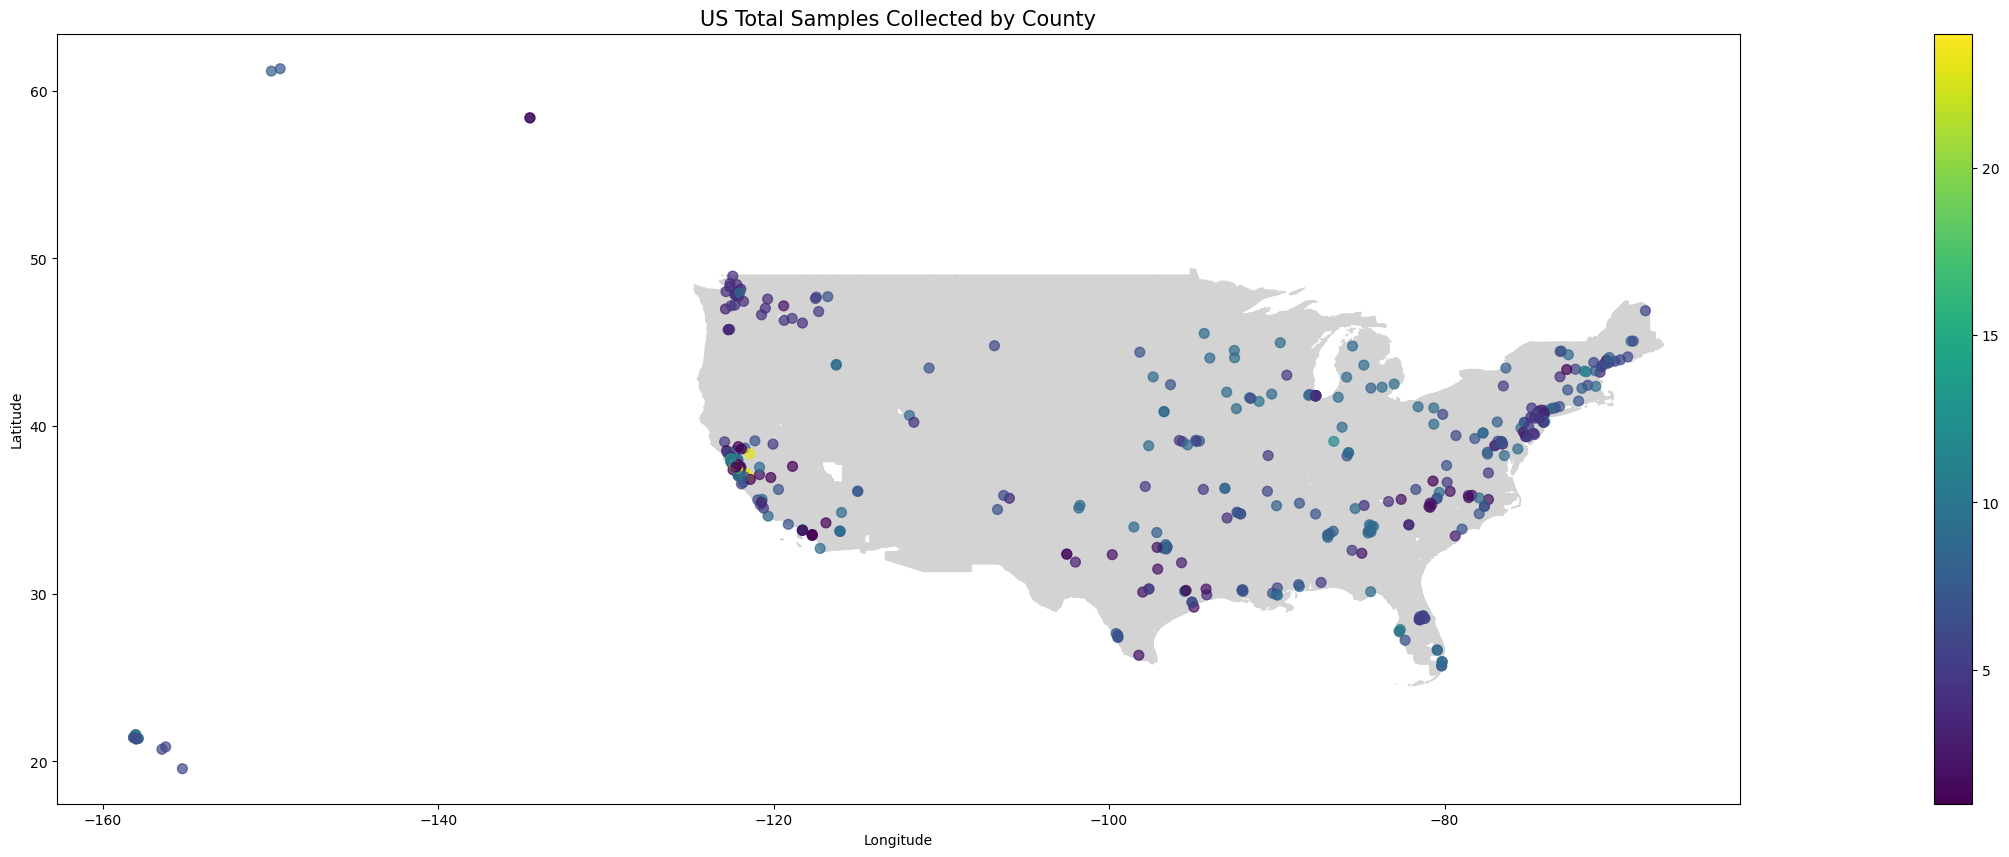

In [6]:
fig, ax = plt.subplots(figsize=(50, 10))

# Plot US map
us = gpd.read_file(geodatasets.get_path("geoda.us_sdoh"))
us.plot(ax=ax, color='lightgray', edgecolor='lightgray')

# Plot df_geo with custom color
df_geo.plot(ax=ax, marker='o', column='total_samples', cmap='viridis', legend=True, markersize=50, alpha=0.7)

# Set plot title and labels
ax.set_title('US Total Samples Collected by County', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

In [11]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [47]:
cases_data_path = '/Users/jayyadav/Downloads/Veritas Data/Untitled spreadsheet - Sheet1.csv'
population_data_path = '/Users/jayyadav/Downloads/Veritas Data/Wastewater Activity - Sheet1.csv'

In [69]:
year_sets = []
cases=[]
population=[]

# Convert each column to an array (list)
x=[]
df = pd.read_csv(cases_data_path)
dataset = [df[col].tolist() for col in df.columns]

cases = dataset[2]
cases.reverse()



# Convert each column to an array (list)
x=[]
df = pd.read_csv(population_data_path)
dataset = [df[col].tolist() for col in df.columns]

population = dataset[1]



cases = cases[len(cases) - len(population) :]
for i in range(len(cases)):
    value = cases[i]
    value = value.replace(',','')
    value = int(value)
    cases[i] = value
    
print(cases)

n = len(cases)
time = np.arange(n)



data = pd.DataFrame({"Cases":cases, "Population":population, "Time":time})
#data = pd.DataFrame({"Cases":cases, "Time":time})
print(data["Population"])

[11677, 15125, 19078, 21335, 20966, 18756, 15317, 11566, 8290, 6041, 4404, 3127, 2505, 1908, 1552, 1410, 1345, 1426, 1433, 1676, 1742, 1940, 2007, 2139, 2194, 2329, 2420, 2588, 2929, 3226, 3401, 3373, 3284, 3166, 3050, 2926, 2808, 2513, 2546, 2377, 2194, 2147, 2198, 2242, 2248, 2201, 2256, 2497, 2592, 3036, 3187, 3319, 3659, 3870, 3688, 3257, 2914, 2643, 2347, 2101, 2153, 1998, 1847, 1761, 1668, 1449, 1373, 1217, 1196, 1027, 945, 838, 757, 742, 693, 633, 612, 583, 542, 492, 510, 540, 553, 672, 752, 921, 1067, 1188, 1313, 1410, 1416, 1456, 1398, 1315, 1392, 1291, 1246, 1392, 1431, 1423, 1731, 1792, 1844, 1935, 2229, 2491, 2577, 2361, 2132, 1738, 1612, 1386, 1322, 1263, 1097, 1037, 842, 733, 629, 562, 493, 426, 422, 333, 335, 341, 320, 308, 360, 417, 410, 457, 489, 599, 727, 850, 881, 756]
0      23.38
1      23.38
2      19.46
3      13.78
4       9.27
       ...  
133     6.85
134     8.19
135     8.47
136     8.41
137     8.78
Name: Population, Length: 138, dtype: float64


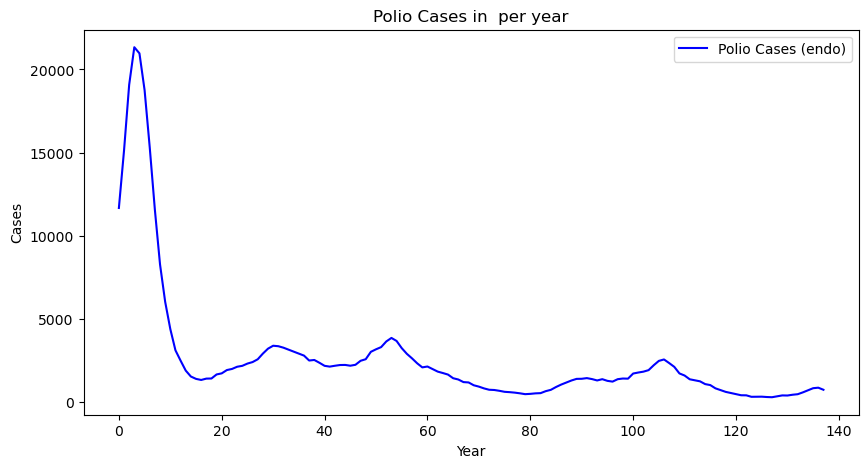

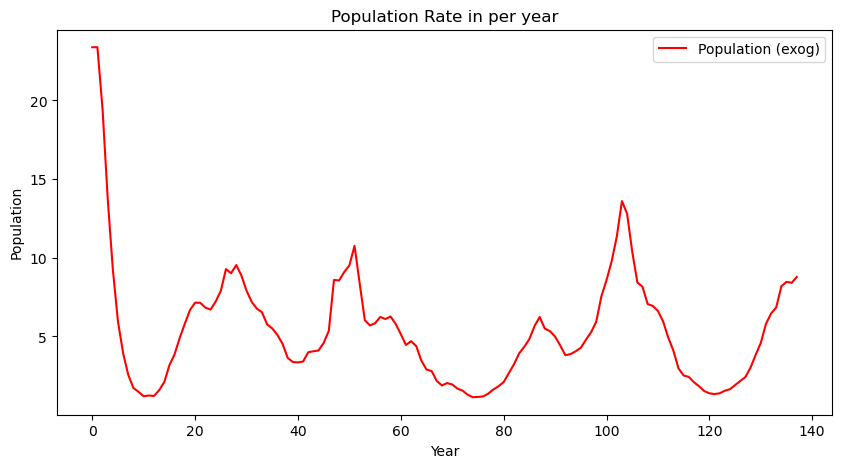

In [70]:
plt.figure(figsize=(10, 5))
# Endogenous variable (y)
plt.plot(data['Cases'], label='Polio Cases (endo)', color='blue')

# Adding labels and legend
plt.title('Polio Cases in  per year')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
# Exogenous variable 1 (exog)
plt.plot(data['Population'], label='Population (exog)', color='red')

# Adding labels and legend
plt.title('Population Rate in per year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Exogenous variable 2 (exog)
#plt.plot(data['exog2'], label='Exogenous Variable 2 (exog)', color='green')

In [88]:
# Train-test split
train_size = int(0.7 * n)
print(train_size)
train, test = train_test_split(data, test_size= n - train_size, shuffle=False)

96


                               SARIMAX Results                                
Dep. Variable:                  Cases   No. Observations:                   96
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -705.929
Date:                Wed, 04 Sep 2024   AIC                           1417.857
Time:                        19:01:11   BIC                           1425.519
Sample:                             0   HQIC                          1420.953
                                 - 96                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Population   -68.3991     47.152     -1.451      0.147    -160.815      24.017
ar.L1          0.8153      0.026     31.288      0.000       0.764       0.866
sigma2      1.634e+05   8633.168     18.924      0.0

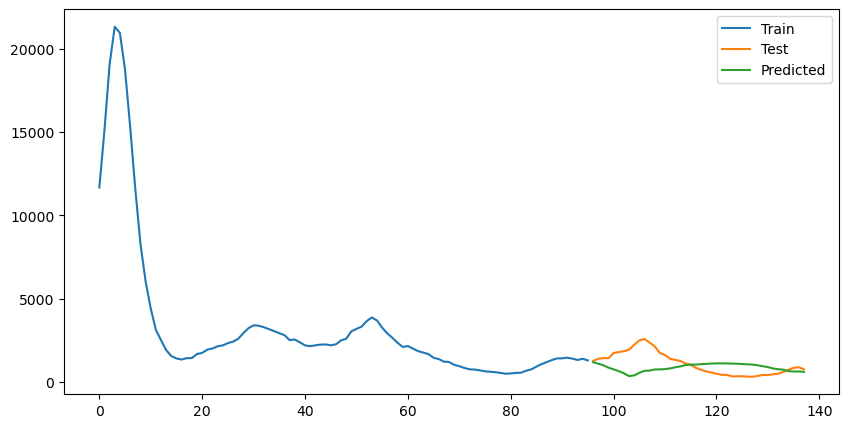

In [89]:
# ARIMAX Model
order = (1, 1, 0)  # ARIMA parameters (p, d, q)
#exog_train = train[['exog1', 'exog2']]
exog_train = train['Population']
model = ARIMA(train['Cases'], order=order, exog=exog_train)
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())

# Make predictions
exog_test = test['Population']
y_pred = model_fit.forecast(steps=len(test), exog=exog_test)

# Compare predictions with actual values
comparison = pd.DataFrame({'Actual': train['Cases'], 'Predicted': y_pred})
print(comparison)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train['Cases'], label='Train')
plt.plot(test['Cases'].index, test['Cases'], label='Test')
plt.plot(test['Cases'].index, y_pred, label='Predicted')
plt.legend()
plt.show()

In [21]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Mean Squared Error: 2771742.6025777776


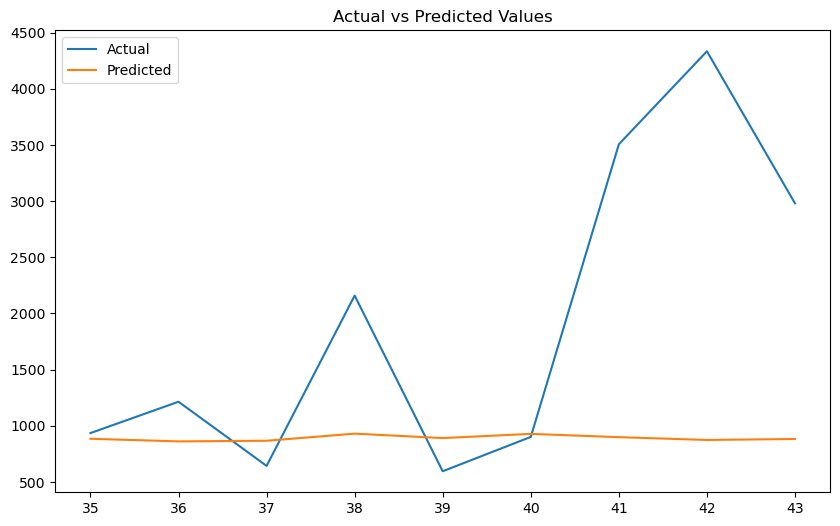

In [22]:
# Lag features
data['lag1'] = data['Cases'].shift(1)
data['lag2'] = data['Cases'].shift(2)

# Moving average features
data['rolling_mean_3'] = data['Cases'].rolling(window=3).mean()

# Drop missing values (due to lag/rolling features)
data.dropna(inplace=True)

# Define the target variable (y) and features (X)
X = data[['Time', 'lag1', 'lag2', 'rolling_mean_3', 'Population']]
y = data['Cases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()
